<a href="https://colab.research.google.com/github/Nckflannery/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

##1. Write a function def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk) that reproduces the example from lecture, and use it to calculate and visualize a range of situations

In [0]:
# Bayesian results
def prob_drunk_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
 for i in range(0,10): 
   prob_drunk_prior = (prob_positive_drunk*prob_drunk_prior)/(prob_positive_drunk*prob_drunk_prior + prob_positive*(1-prob_drunk_prior))
   print(f'Likelyhood that somebody is drunk given they tested positive on {i+1} tests: {round(prob_drunk_prior*100, 6)}%')

In [0]:
prob_drunk_positive(.001, .08, 1)

Likelyhood that somebody is drunk given they tested positive on 1 tests: 1.235788%
Likelyhood that somebody is drunk given they tested positive on 2 tests: 13.525211%
Likelyhood that somebody is drunk given they tested positive on 3 tests: 66.15997%
Likelyhood that somebody is drunk given they tested positive on 4 tests: 96.068951%
Likelyhood that somebody is drunk given they tested positive on 5 tests: 99.673716%
Likelyhood that somebody is drunk given they tested positive on 6 tests: 99.973819%
Likelyhood that somebody is drunk given they tested positive on 7 tests: 99.997905%
Likelyhood that somebody is drunk given they tested positive on 8 tests: 99.999832%
Likelyhood that somebody is drunk given they tested positive on 9 tests: 99.999987%
Likelyhood that somebody is drunk given they tested positive on 10 tests: 99.999999%


## 2. Explore scipy.stats.bayes_mvs - read its documentation, and experiment with it on data you've tested in other ways earlier this week

In [0]:
import scipy.stats as stats
import pandas as pd
import numpy as np
# Load the data
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

--2019-09-18 23:10:22--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2019-09-18 23:10:22 (589 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]



In [0]:
# Read in data and set column names
df = pd.read_csv('house-votes-84.data', names=['party','handicapped-infants',
                          'water-project', 'budget', 'physician-fee-freeze', 
                          'el-salvador-aid', 'religious-groups', 
                          'anti-satellite-ban', 'aid-to-contras', 'mx-missile',
                          'immigration', 'synfuels', 'education', 
                          'right-to-sue','crime','duty-free', 'south-africa'])
# Clean data
df = df.replace({'y':1 , 'n':0, '?':np.nan})
# Seperate data by Democrat or Republicn
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [0]:
# Confidence interval function
def confidence_interval(data, confidence=0.95):

  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1) / np.sqrt(n)
  margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [0]:
stats.bayes_mvs(dem['duty-free'].dropna(), alpha=.95)

(Mean(statistic=0.6374501992031872, minmax=(0.5775687099725446, 0.6973316884338299)),
 Variance(statistic=0.23390309728826628, minmax=(0.19617923247429017, 0.27875339693441)),
 Std_dev(statistic=0.48314800506771427, minmax=(0.44292124861457044, 0.5279710190288951)))

In [0]:
confidence_interval(dem['duty-free'].dropna())

(0.6374501992031872, 0.5775687099725446, 0.6973316884338299)

In [0]:
stats.bayes_mvs(rep['mx-missile'].dropna(), alpha=.95)

(Mean(statistic=0.11515151515151516, minmax=(0.06593485907282265, 0.16436817123020767)),
 Variance(statistic=0.10377852600074824, minmax=(0.08349650021489281, 0.1288936365098166)),
 Std_dev(statistic=0.32164999257610655, minmax=(0.2889576097196487, 0.3590175991644652)))

In [0]:
confidence_interval(rep['mx-missile'].dropna())

(0.11515151515151516, 0.06593485907282265, 0.16436817123020767)

## 3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach

In [0]:
# Traditional/frequentist function
def traditional(prob_positive, prob_false_positive):
  for i in range(1,11):
      prob_positive1 = prob_positive - prob_false_positive**(i)
      print(f'Likelyhood that somebody is drunk given they tested positive on {i} tests: {prob_positive1*100}%')

In [6]:
traditional(1, .08)

Likelyhood that somebody is drunk given they tested positive on 1 tests: 92.0%
Likelyhood that somebody is drunk given they tested positive on 2 tests: 99.36%
Likelyhood that somebody is drunk given they tested positive on 3 tests: 99.9488%
Likelyhood that somebody is drunk given they tested positive on 4 tests: 99.995904%
Likelyhood that somebody is drunk given they tested positive on 5 tests: 99.99967232%
Likelyhood that somebody is drunk given they tested positive on 6 tests: 99.9999737856%
Likelyhood that somebody is drunk given they tested positive on 7 tests: 99.99999790284801%
Likelyhood that somebody is drunk given they tested positive on 8 tests: 99.99999983222784%
Likelyhood that somebody is drunk given they tested positive on 9 tests: 99.99999998657823%
Likelyhood that somebody is drunk given they tested positive on 10 tests: 99.99999999892626%


In [0]:
# Let's rewrite the functions to fix the outputs for plotting
# Bayesian results
def prob_drunk_positive1(prob_drunk_prior, prob_positive, prob_positive_drunk):
  prob_df = []
  for i in range(0,10): 
   prob_drunk_prior = (prob_positive_drunk*prob_drunk_prior)/(prob_positive_drunk*prob_drunk_prior + prob_positive*(1-prob_drunk_prior))
   prob_df.append(prob_drunk_prior)
  return prob_df

# Traditional/frequentist
def traditional1(prob_positive, prob_false_positive):
  prob_df = []
  for i in range(1,11):
      prob_positive1 = prob_positive - prob_false_positive**(i)
      prob_df.append(prob_positive1)
  return prob_df

In [0]:
import matplotlib.pyplot as plt

bayesian = prob_drunk_positive1(.001, .08, 1)
traditional = traditional1(1, .08)

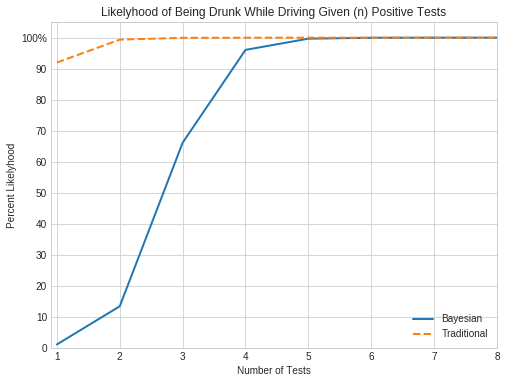

In [9]:
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(bayesian, lw=2, label='Bayesian')
ax.plot(traditional, '--', lw=2, label='Traditional')

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8'])
ax.set_yticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
ax.set_yticklabels(['0', '10', '20', '30', '40', '50','60', '70', '80', '90', '100%'])
ax.set_xlim(-.1,7)
ax.set_ylim(0,1.05)
ax.set_title('Likelyhood of Being Drunk While Driving Given (n) Positive Tests')
ax.set_ylabel('Percent Likelyhood')
ax.set_xlabel('Number of Tests')
ax.legend()
plt.show()

##4.  In your own words, summarize the difference between Bayesian and Frequentist statistics

Bayesian statistics is a way to increase your accuracy based on prior knowledge and is more accurate than traditional methods for small sample sizes. To me it looks like a way to compare two probabilities, for example: 
In the Sun Exploding comic, when you take into account the probability of the sun exploding versus the computer rolling two dice that land on 6 you can see that the sun probably has not exploded. It is also good to look at small sample sizes that would 'naturally' or 'intuitively' give the opposite outcome.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)